# 1. Import Necessary Libraries:





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,classification_report

# 2. Load and Explore the Dataset:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
data = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 3.Visualization Data

<function matplotlib.pyplot.show(close=None, block=None)>

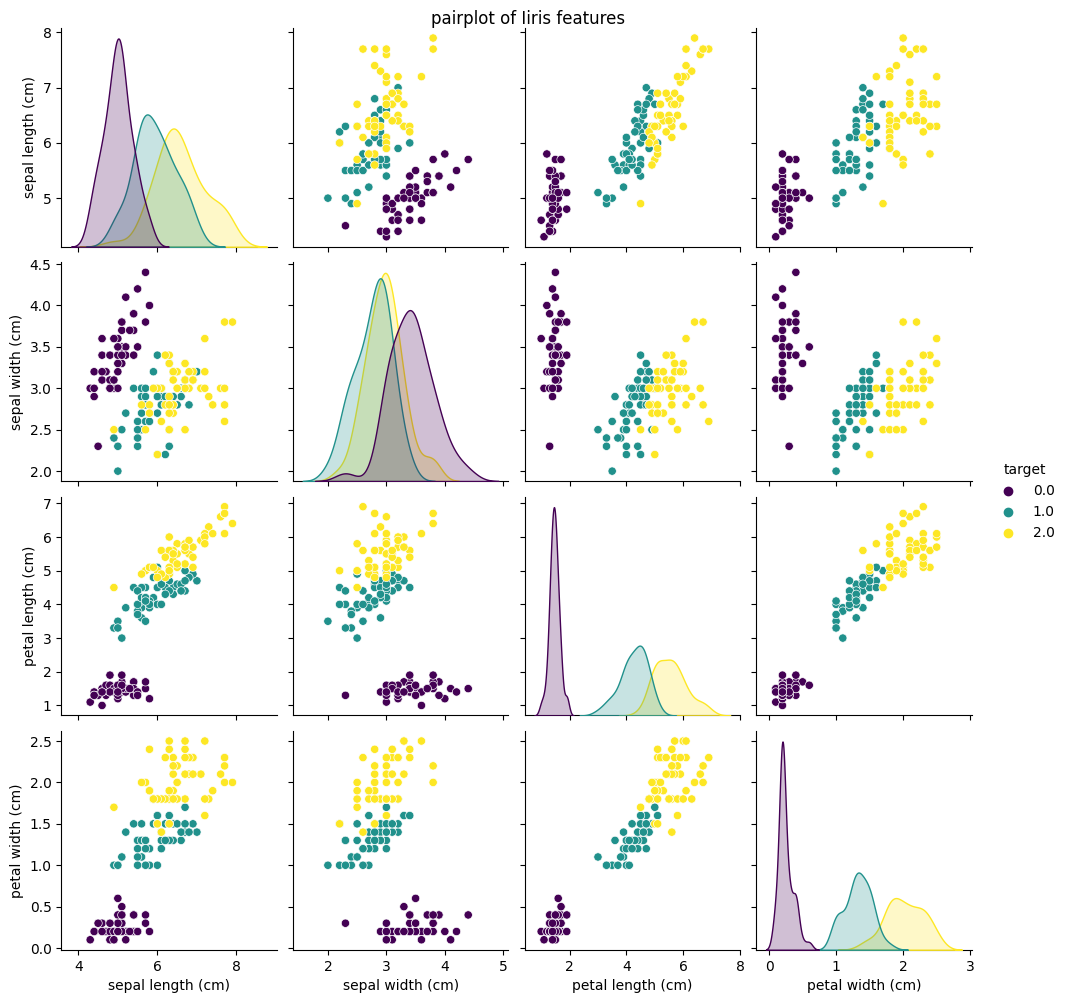

In [4]:
sns.pairplot(data , hue='target', palette='viridis')
plt.suptitle('pairplot of Iiris features',y=1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

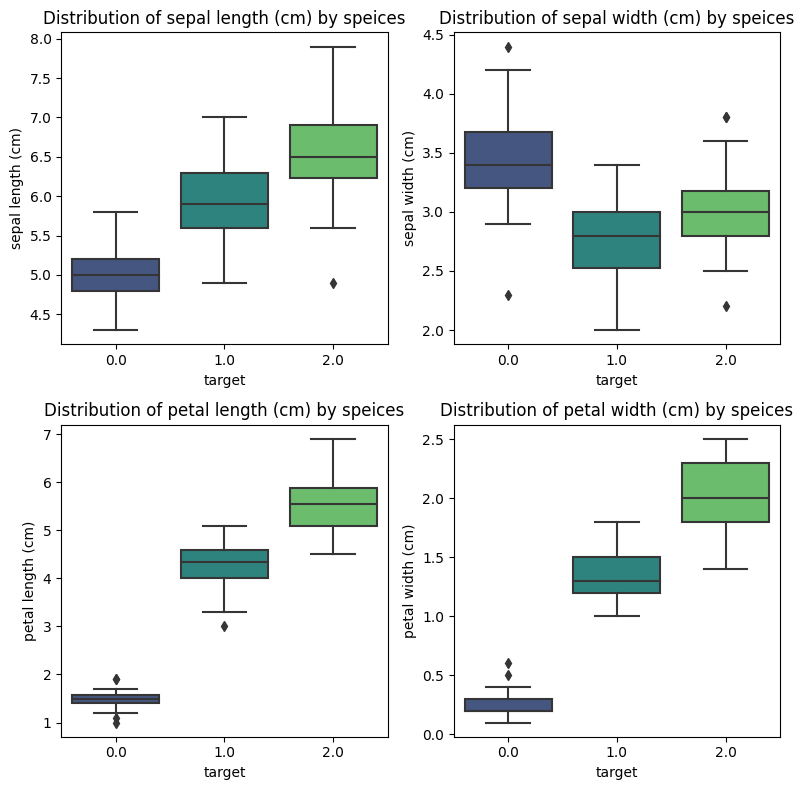

In [5]:
plt .figure(figsize=(8,8))
for i, feature in enumerate(iris['feature_names']):
  plt.subplot(2,2 ,i+1)
  sns.boxplot(x='target' , y=feature, data=data ,palette='viridis')
  plt.title(f'Distribution of {feature} by speices')
plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

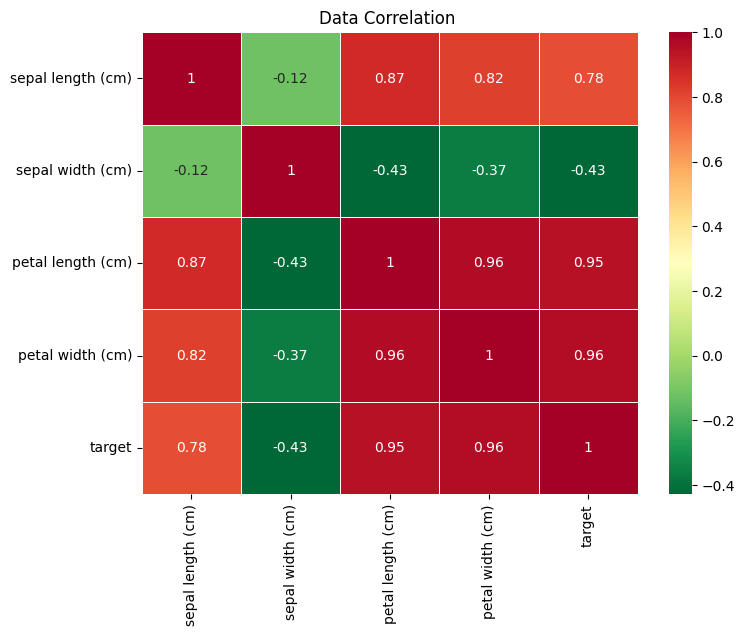

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn_r',linewidths=0.5)
plt.title('Data Correlation ')
plt.show

# 4. Data Cleaning:

In [7]:
def data_info(data):
  cols = []
  unique_valu = []
  n_unique = []
  data_type = []
  nulls = []
  for col in data.columns:
    cols.append(col)
    data_type.append(data[col].dtypes)
    n_unique.append(data[col].nunique())
    unique_valu.append(data[col].unique())
    nulls.append(data[col].isnull().sum())

  return pd.DataFrame({'colums':cols,'Unique Valu':unique_valu,'NO Unique':n_unique,'Data Type':data_type,'Nulls':nulls})

In [8]:
data_info(data)

,colums,Unique Valu,NO Unique,Data Type,Nulls
0,sepal length (cm),"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...",35,float64,0
1,sepal width (cm),"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...",23,float64,0
2,petal length (cm),"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...",43,float64,0
3,petal width (cm),"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...",22,float64,0
4,target,"[0.0, 1.0, 2.0]",3,float64,0


# 5. Preprocessing Data

> Indented block



In [9]:
X = data.drop('target', axis=1)
Y = data['target']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X ,Y ,train_size=0.8 ,shuffle=True ,random_state=42)

In [11]:
x_train.shape,x_test.shape ,y_train.shape ,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [12]:
scaler = StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test.values.reshape(-1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 6. Modeling






### 6.1 logistic Regresstion


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logistic_model = LogisticRegression()

logistic_model.fit(x_train_scaler, y_train)

y_pred = logistic_model.predict(x_test_scaler)

In [15]:
logistic_accuracy = accuracy_score(y_test, y_pred)

In [16]:
print('Accuracy = ',logistic_accuracy)

Accuracy =  1.0


In [27]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logistic_model, x_train, y_train, cv=5)  # Adjust the number of folds as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         0.875      1.         0.95833333]
Mean CV Score: 0.9666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### *6.2* XGBOOST

In [18]:
from xgboost import XGBClassifier

In [19]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42,n_estimators = 500,)

xgb_model.fit(x_train_scaler, y_train)

y_pred = xgb_model.predict(x_test_scaler)

In [20]:
xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ',xgb_accuracy)

Accuracy =  1.0


In [21]:
cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=5)  # Adjust the number of folds as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.95833333 0.95833333 0.83333333 0.95833333 0.95833333]
Mean CV Score: 0.9333333333333333


### 6.3 kNN


In [22]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
KNN_model = KNeighborsClassifier(n_neighbors=k)

KNN_model.fit(x_train_scaler,y_train)

KNeighborsClassifier()

In [23]:
y_pred = KNN_model.predict(x_test_scaler)

In [24]:
KNN_accuracy = accuracy_score(y_test ,y_pred)
print('Accuracy = ',KNN_accuracy)

Accuracy =  1.0


In [25]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(KNN_model, x_train, y_train, cv=5)  # Adjust the number of folds as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.95833333 0.95833333 0.83333333 1.         0.95833333]
Mean CV Score: 0.9416666666666667


In [26]:
print('Classification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

